# Project: Wrangling and Analyze Data - Darragh Merrick

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [174]:
# load libraries
import pandas as pd
import numpy as np
import requests
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# load twitter-archive-enhanced.csv
df_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding="utf-8")
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [175]:
# import and saving Data programatically 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_prediction.tsv', 'wb').write(response.content)

335079

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [176]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '<redacted>'
consumer_secret = '<redacted'
access_token = '704400355774357504-ylptnyb27Z9sybJCgUOOB1nyjb2iWDV'
access_secret = '2YiPQXlFTzXHNWtmenxqRNa6ff5DmNuJ6rv0FxEjEWact'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [177]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [178]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
            
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Rate limit reached. Sleeping for: 714


Fail
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933

Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
1433: 697482927769255936
Success
14

Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
1682: 681981167097122816
Success
16

Rate limit reached. Sleeping for: 691


Fail
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833:

Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
2082: 670822709593571328
Success
20

Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
23

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Quality issues

Low quality data is commonly referred to as dirty data. Dirty data has issues with its content.
Data that has issues with data content including:

* Missing data
* Invalid data
* Inaccurate data
* Inconsistent data

Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).

Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.

Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

### File 1: twitter_archive_enhanced.csv
**Directly download the WeRateDogs Twitter archive data**

### Visual Inspection of data

In [179]:
# Display the archive table
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Visual Inspection of data

In [180]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [181]:
df_archive.shape

(2356, 17)

In [182]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


`archive` columns:
- **tweet_id**: *Type:Int64.* The integer representation of the unique identifier for this Tweet. This number is greater than 53 bits and some programming languages may have difficulty/silent defects in interpreting it. Using a signed 64 bit integer for storing this identifier is safe. 
- **in_reply_to_status_id**: *Type:float64.* Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID. Example:
- **in_reply_to_user_id** *Type:float64.* Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet. 
- **timestamp**: *Type: string* UTC time when this Tweet was created
- **source**: *Type: string* Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web.
- **text**: *Type: string* The actual UTF-8 text of the status update. See twitter-text for details on what characters are currently considered valid.
- **retweeted_status_id**: *Type: float64.* Users can amplify the broadcast of Tweets authored by other users by retweeting . Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. This attribute contains a representation of the original Tweet that was retweeted. 
- **retweeted_status_user_id**:*Type: float64.* 
- **retweeted_status_timestamp**:  *Type: string* UTC time when this retweet status was created
- **expanded_urls**: 
- **rating_numerator**: *Type:Int64.*  the top number of a fraction 
- **rating_denominator**: *Type:Int64.*  the bottom number of a fraction 
- **doggo**: *Type: string* DoggoLingo term: Adult dog
- **floofer**: *Type: string* DoggoLingo term: A very fluffy dog such as a Samoyed or Pomeranian
- **pupper**: *Type: string* DoggoLingo term: Puppy dog
- **puppo**: *Type: string* DoggoLingo term: A cute dog, usually a small one.

In [183]:
# The 4 DoggoLingo columns are rarely completed, making these categories inconsistant and unuseable
# This query shows the rows with no DoggoLingo value entered
df_archive.loc[(df_archive['doggo'] == 'None') & (df_archive['floofer'] == 'None')& (df_archive['pupper'] == 'None') & (df_archive['puppo'] == 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [184]:
no_dogLingo=1976/2536

percentage=round(no_dogLingo, 2);
print('Number of tweets with no DogLingo: doggo, pupper, floofer or puppo value entered is', percentage,'%')

Number of tweets with no DogLingo: doggo, pupper, floofer or puppo value entered is 0.78 %


In [185]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [186]:
df_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Juckson        1
Harrison       1
Karma          1
Pherb          1
Alejandro      1
Name: name, Length: 957, dtype: int64

In [187]:
df_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/859196978902773760/video/1                                                                                                                                                                                                                                              2
https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1          2
http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1    2
https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/statu

In [188]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### File 2:image_prediction.tsv

    the datatype of the id - columns is integer and should be str
    contains retweets (duplicated rows in column jpg_url)
    there are pictures in this table that are not dogs
    the predictions are sometimes uppercase, sometimes lowercase
    also there is a "_" instead of a whitespace in the predictions

In [189]:
df_predictions = pd.read_csv("image_prediction.tsv", sep='\t')

df_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [190]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [191]:
df_predictions.shape


(2075, 12)

In [192]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [193]:
df_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [194]:
df_predictions.jpg_url.duplicated().sum()

66

In [195]:
df_predictions.tweet_id.duplicated().sum()

0

### 3.tweet_json.txt
 the datatype of the id - columns is integer and should be str

This is one complete json dumped tweet with all the fields from tweepy downloaded data into tweet_json.txt.
Lets parse the relevant fields and save them to a data frame, without duplicating columns we already have in other tables:

Columns to keep:
 "tweet_id": needed to match the data to a row in the twitter-archive-enhanced.csv
 "retweet_count"
 "favorite_count": 
 "retweeted":
 "display_text_range": 

"created_at": "Tue Aug 01 16:23:56 +0000 2017",
"id": 892420643555336193, 
"id_str": "892420643555336193",
"full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
"truncated": false, 
"display_text_range": [0, 85],
"entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, 
"extended_entities": {"media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]},
"source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "in_reply_to_status_id": null,
"in_reply_to_status_id_str": null,
"in_reply_to_user_id": null, 
"in_reply_to_user_id_str": null,
"in_reply_to_screen_name": null, 
"user": {"id": 4196983835, "id_str": "4196983835", "name": "WeRateDogs\u00ae", "screen_name": "dog_rates", "location": "all our links \u279c", "description": "Your Only Source For Professional Dog Ratings Instagram and Facebook \u279c WeRateDogs partnerships@weratedogs.com \u2800\u2800\u2800\u2800\u2800\u2800\u2800\u2800\u2800\u2800\u2800\u2800","url": "https://t.co/YPc2Xq4Va2","entities": {"url": {"urls": [{"url": "https://t.co/YPc2Xq4Va2", "expanded_url": "http://links.weratedogs.com", "display_url": "links.weratedogs.com", "indices": [0, 23]}]}, "description": {"urls": []}}, 
"protected": false,
"followers_count": 9092255,
"friends_count": 20, 
"listed_count": 6994,
"created_at": "Sun Nov 15 21:41:29 +0000 2015",
"favourites_count": 145880, 
"utc_offset": null, 
"time_zone": null, 
"geo_enabled": true, 
"verified": true, 
"statuses_count": 14616, 
"lang": null, 
"contributors_enabled": false, 
"is_translator": false, 
"is_translation_enabled": false, 
"profile_background_color": "000000", 
"profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_image_url": "http://pbs.twimg.com/profile_images/1455209595085856769/p7NAmmNn_normal.jpg", 
"profile_image_url_https": "https://pbs.twimg.com/profile_images/1455209595085856769/p7NAmmNn_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/4196983835/1617810473", 
"profile_link_color": "F5ABB5", 
"profile_sidebar_border_color": "000000", 
"profile_sidebar_fill_color": "000000", 
"profile_text_color": "000000",
"profile_use_background_image": false, 
"has_extended_profile": false, 
"default_profile": false, 
"default_profile_image": false, 
"following": false, 
"follow_request_sent": false, 
"notifications": false, 
"translator_type": "none", 
"withheld_in_countries": []}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "retweet_count": 7147, "favorite_count": 34390, "favorited": false, "retweeted": false, "possibly_sensitive": false, "possibly_sensitive_appealable": false, "lang": "en"


In [197]:
api_data = []

#read the created file
with open("tweet_json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append the specified columns          
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
            #tweet["entities"]["media"][0]["media_url"]
        except:
            print("Error.") 
            
df_tweepy = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
df_tweepy.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7139,34359,False,"[0, 85]"
1,892177421306343426,5373,29783,False,"[0, 138]"
2,891815181378084864,3538,22417,False,"[0, 121]"
3,891689557279858688,7333,37497,False,"[0, 79]"
4,891327558926688256,7885,35857,False,"[0, 138]"


In [198]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2326 non-null   int64 
 1   retweet_count       2326 non-null   int64 
 2   favorite_count      2326 non-null   int64 
 3   retweeted           2326 non-null   bool  
 4   display_text_range  2326 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.1+ KB


In [199]:
df_tweepy.shape

(2326, 5)

In [200]:
df_tweepy.describe()

,tweet_id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.418609e+17,2516.304815,7169.672829
std,6.824661e+16,4261.232585,11138.572965
min,6.660209e+17,1.000000,0.000000
25%,6.782612e+17,506.000000,1240.250000
50%,7.180382e+17,1170.000000,3097.000000
75%,7.986712e+17,2914.500000,8752.250000
max,8.924206e+17,72109.000000,147139.000000


In [201]:
df_tweepy.isnull().sum()

tweet_id              0
retweet_count         0
favorite_count        0
retweeted             0
display_text_range    0
dtype: int64

## All Tables

In [202]:
all_columns = pd.Series(list(df_archive) + list(df_predictions) + list(df_tweepy))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [229]:
# Lets look at the datatypes for each dataset
df_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [230]:
df_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [231]:
df_tweepy.dtypes

tweet_id               int64
retweet_count          int64
favorite_count         int64
retweeted               bool
display_text_range    object
dtype: object

In [404]:
# Make copies of original pieces of data
# copy dataframes for cleaning purposes
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_tweepy_clean = df_tweepy.copy()

### Quality Issues

#### Define Steps

1. datatype of the "id" column is integer and should be str
<p></p>

2. datatype of the "timestamp" column is object and should be datetime
<p></p>

3. Replace the value 'None' with NaN (missing value)
<p></p>

4. There are values some of the dog names are seem not to be correct such as:
* None
* 10
* a
* an 
* by 
<p></p>

5. Drop columns with high numbers of missing values from archive table:
* in_reply_to_status_id 
* in_reply_to_user_id 
* retweeted_status_id 
* retweeted_status_user_id 
* retweeted_status_timestamp'
<p></p>

6. The column "expanded URLs" has missing values and duplicates values.
* expanded_urls with null values = 59. Drop duplicates from archive table.
<p></p>

7. The wrong datatype in the 'img_num' Column is set. 
<p></p>

8. There are 66 duplicates of the same image in the 'jpg_url' column.
Drop duplicates in predictions
<p></p>


### Tidiness Issues

#### Define Steps

1.  Merge the  dataframe twitter_archive, dataframe image_predictions, and tweet_json dataframes

2. Only keep the confidence variable with the highest confidence rate in the predictions table

3. doggo, floofer, pupper, puppo these 4 variables should be combined into one categorical variable Dog Type.

### Cleaniness Issue #1 The Datatype of the "tweet_id" column is integer and should be a string


### Define  
- Change tweet_id from an integer to a string .

### Code
Convert the dataype using .ASTYPE() method


In [405]:
#Convert tweet_id in the 3 datasets, or the datasets won't merge later.
# Tweet_id is the common field between all 3 tables, like the primary key.
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_predictions_clean['tweet_id'] = df_predictions_clean['tweet_id'].astype(str)
df_tweepy_clean['tweet_id'] = df_tweepy_clean['tweet_id'].astype(str)

### Test
Confirm that the twet_id is now an object

In [406]:
print('Archive Tweet_id DataType:',df_archive_clean['tweet_id'].dtypes)
print('Predictions Tweet_id DataType:',df_predictions_clean['tweet_id'].dtypes)
print('Tweepy Tweet_id DataType:',df_tweepy_clean['tweet_id'].dtypes)

Archive Tweet_id DataType: object
Predictions Tweet_id DataType: object
Tweepy Tweet_id DataType: object


### Cleaniness Issue #2 The Datatype of the "timestamp" column is a string and should be datetime


### Define
Timestamp is a string and not in the datetime format

Set as:
%m Month as a number 01-12 12
%Y Year, full version
%d Day of month 01-31

### Code

In [407]:
#Change the string 'timestamp' column to a datetime format
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'], format = "%Y-%m-%d ")

## Test

In [408]:
print('Archive TimeStamp DataType:',df_archive_clean['timestamp'].dtypes)

Archive TimeStamp DataType: datetime64[ns, UTC]


### Cleaniness Issue #3 Replace the value 'None' with NaN, the correct missing data label


### Define
Use the correct missing data value Nan


### Code


In [409]:
df_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [410]:
df_archive_clean = df_archive_clean.fillna(value=np.nan)
# This didn't work, but I found a way to convert none to NaN on a per column basis.

In [411]:
df_archive_clean.doggo.replace('None', 'NaN', inplace=True) 
df_archive_clean.floofer.replace('None', 'NaN', inplace=True) 
df_archive_clean.pupper.replace('None', 'NaN', inplace=True) 
df_archive_clean.puppo.replace('None', 'NaN', inplace=True) 

## Test

In [412]:
#Confirm the None values have been replaced with NaN
df_archive_clean.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


### Cleaniness Issue #4 Replace Invalid names from name Column with NaN


### Define
#### Define 
Inspect the names, and replace any of the None and incorrect name alues with NaN


### Code


In [413]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df_archive_clean['name'].value_counts())

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
the                 8
Sadie               8
an                  7
Bailey              7
Toby                7
Buddy               7
Daisy               7
Scout               6
Rusty               6
Milo                6
Jax                 6
Oscar               6
Jack                6
Bella               6
Dave                6
Koda                6
Leo                 6
Stanley             6
Finn                5
Sammy               5
Louis               5
Gus                 5
Oakley              5
Alfie               5
George              5
very                5
Bentley             5
Chester             5
Larry               5
Phil                5
Sunny               5
Derek               4
Hank                4
Ruby                4
Moose     

In [414]:
df_archive_clean.name.replace('None', 'NaN', inplace=True) 
df_archive_clean.name.replace('a', 'NaN', inplace=True) 
df_archive_clean.name.replace('an', 'NaN', inplace=True) 
df_archive_clean.name.replace('very', 'NaN', inplace=True) 
df_archive_clean.name.replace('the', 'NaN', inplace=True) 
df_archive_clean.name.replace('not', 'NaN', inplace=True) 
df_archive_clean.name.replace('quite', 'NaN', inplace=True) 
df_archive_clean.name.replace('actually', 'NaN', inplace=True) 

### Test

In [415]:
print(df_archive_clean['name'].value_counts())

NaN               828
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
Sadie               8
Daisy               7
Bailey              7
Buddy               7
Toby                7
Scout               6
Leo                 6
Jack                6
Dave                6
Oscar               6
Bella               6
Stanley             6
Milo                6
Koda                6
Jax                 6
Rusty               6
Larry               5
Oakley              5
Gus                 5
Phil                5
Chester             5
Louis               5
Finn                5
Sunny               5
Sammy               5
Bentley             5
George              5
Alfie               5
Bruce               4
Derek               4
Ruby                4
one                 4
Maggie              4
Cassie              4
Jerry               4
Riley     

### Cleaniness Issue #5 Drop Columns with missing values
### Define

Check each data from with the .isnull().sum command


### Code

In [416]:
df_archive_clean.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [417]:
df_archive_clean.shape

(2356, 17)

In [418]:
print('The in_reply_to_status_id column has ',"{:.2f}".format(2278/2356), '% data missing')
print('The in_reply_to_user_id column has ',"{:.2f}".format(2278/2356), '% data missing')
print('The retweeted_status_id column has ',"{:.2f}".format(2175/2356), '% data missing')
print('The retweeted_status_user_id column has ',"{:.2f}".format(2175/2356), '% data missing')
print('The retweeted_status_timestamp has ',"{:.2f}".format(2175/2356), '% data missing')

The in_reply_to_status_id column has  0.97 % data missing
The in_reply_to_user_id column has  0.97 % data missing
The retweeted_status_id column has  0.92 % data missing
The retweeted_status_user_id column has  0.92 % data missing
The retweeted_status_timestamp has  0.92 % data missing


In [419]:
df_predictions_clean.isnull().sum()


tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [420]:
df_tweepy_clean.isnull().sum()

tweet_id              0
retweet_count         0
favorite_count        0
retweeted             0
display_text_range    0
dtype: int64

In [421]:
df_archive_clean.drop(['in_reply_to_user_id','in_reply_to_status_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

## Test

In [422]:
#the 59 null data is not enough to drop the entire column
df_archive_clean.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### Cleaniness Issue #6 Drop the duplicate values from the "expanded_urls" column

### Define

We can drop with:
data.drop_duplicates(subset ="First Name",
                     keep = False, inplace = True)


### Code

In [423]:
df_archive_clean[df_archive_clean['expanded_urls'].duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,NaN,NaN,NaN,NaN,NaN
64,879674319642796034,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,10,NaN,NaN,NaN,NaN,NaN
75,878281511006478336,2017-06-23 16:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN
76,878057613040115712,2017-06-23 01:10:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN
98,873213775632977920,2017-06-09 16:22:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,NaN,NaN,pupper,NaN
113,870726314365509632,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,NaN,NaN,NaN,NaN,NaN
126,868552278524837888,2017-05-27 19:39:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,NaN,NaN,NaN,NaN
135,866450705531457537,2017-05-22 00:28:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,NaN,NaN,pupper,NaN
136,866334964761202691,2017-05-21 16:48:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,NaN,NaN,NaN,NaN
148,863427515083354112,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,NaN,NaN,NaN,NaN,NaN


In [424]:
df_archive_clean.drop_duplicates(subset ="expanded_urls",
                     keep = False, inplace = True)

### Test

In [425]:
df_archive_clean[df_archive_clean['expanded_urls'].duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Cleaniness Issue #7 The wrong datatype in the 'img_num' Column is set. 

### Define
It should be changed to string
Convert the dataype using  the .ASTYPE() method


### Code

In [426]:
df_predictions_clean['img_num'] = df_predictions_clean['img_num'].astype(str)

## Test
Check the datatype using type method

In [427]:
df_predictions_clean.columns.get_loc("img_num")

2

In [428]:
type(df_copy.iloc[0,2])

str

### Cleaniness Issue #8 Drop the duplicate values from the "jpg_url" column

Define

We can drop with:
data.drop_duplicates(subset ="First Name",
                     keep = False, inplace = True)


### Code


In [429]:
df_predictions_clean[df_predictions_clean['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [430]:
df_predictions_clean.drop_duplicates(subset ="jpg_url",
                     keep = False, inplace = True)

## Test

In [431]:
df_predictions_clean[df_predictions_clean['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Tidiness Issue #1 The four dog type values are stored in four different columns containing the same data. 
- remove doggo, floofer, pupper, puppo

### Define
- we can delete any column using .DROP() Method

### Code


In [432]:
print(df_archive_clean["doggo"],df_archive_clean["floofer"],df_archive_clean["pupper"],df_archive_clean["puppo"])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9       doggo
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43      doggo
44        NaN
45        NaN
46        NaN
47        NaN
48        NaN
49        NaN
50        NaN
51        NaN
52        NaN
53        NaN
54        NaN
56        NaN
57        NaN
58        NaN
59        NaN
60        NaN
61        NaN
62        NaN
63        NaN
65        NaN
66        NaN
67        NaN
69        NaN
70        NaN
71        NaN
72        NaN
77        NaN
78        NaN
79    

In [433]:
# search the prob
df_archive_clean.loc[(df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1];

In [434]:
df_archive_clean.reset_index(drop = True, inplace = True)

In [435]:
# create list of stages
dog_list =['doggo', 'floofer', 'pupper', 'puppo']

In [436]:
import numpy as np
# create new column with empty lists
df_archive_clean['dog_type'] = np.empty((df_archive_clean.shape[0], 0)).tolist()

In [437]:
# append list in cells of column 'dog_type' with values from other columns
def d_type(df_archive_clean):    
    for i in range(df_archive_clean.shape[0]):
        for x in dog_list:
            if x in df_archive_clean.loc[i,['doggo', 'floofer', 'pupper', 'puppo']].tolist():
                df_archive_clean.loc[i,'dog_type'].append(x)
            else:
                continue   
        # convert list into string
        df_archive_clean.loc[i,'dog_type'] = ", ".join(df_archive_clean.loc[i,'dog_type'])
    # replace empty strings with another string
    df_archive_clean.dog_type = df_archive_clean.dog_type.replace('',np.nan)
    #archive_clean.dog_type = archive_clean.dog_type.replace(np.nan)

In [438]:
dog_type(df_archive_clean)

In [439]:
# check 
df_archive_clean.loc[(df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1].head()

# drop old columns
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

df_archive_clean.dog_type = df_archive_clean.dog_type.astype('category')

## Test

In [440]:
#check whether NaNs still in table
df_archive_clean.dog_type.value_counts()

pupper            221
doggo              72
puppo              22
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_type, dtype: int64

### Tidiness Issue #2: Only keep the confidence variable with the highest confidence rate in the predictions table

#### Define 
merge all of the neural network results into into 1 cell called confidence.

#### Code

In [442]:
# drop columns
df_predictions_clean.drop(['p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [443]:
# change column names
col_names = ['tweet_id', 'jpg_url', 'img_num', 
             'prediction', 'confidence']
df_predictions_clean.columns = col_names

## Test

In [444]:
df_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493


### Tidiness Issue #3: the data is spread across 3 tables and should be merged into 1 table

#### Define 
3 separate tables can be joined with the pd.concat command

#### Code

In [454]:
df_copy = pd.concat([df_archive_clean, df_predictions_clean, df_tweepy_clean], join='outer', axis=1)

In [455]:
#Tables have been merged successfully:
df_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,tweet_id,jpg_url,img_num,prediction,confidence,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,892420643555336193,7139,34359,False,"[0, 85]"
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,892177421306343426,5373,29783,False,"[0, 138]"
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,891815181378084864,3538,22417,False,"[0, 121]"
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,891689557279858688,7333,37497,False,"[0, 79]"
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,891327558926688256,7885,35857,False,"[0, 138]"


In [456]:
df_copy.shape

(2326, 19)

In [457]:
df_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type',
       'tweet_id', 'jpg_url', 'img_num', 'prediction', 'confidence',
       'tweet_id', 'retweet_count', 'favorite_count', 'retweeted',
       'display_text_range'],
      dtype='object')

We now have 1 merged dataset with 34 columns.


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [458]:
# storing the dataset
df_copy.to_csv('twitter_archive_master.csv', encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [459]:
#Import the clened dataset
df = pd.read_csv('twitter_archive_master.csv')

In [460]:
df.head(5)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,tweet_id.1,jpg_url,img_num,prediction,confidence,tweet_id.2,retweet_count,favorite_count,retweeted,display_text_range
0,0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,892420643555336193,7139,34359,False,"[0, 85]"
1,1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,892177421306343426,5373,29783,False,"[0, 138]"
2,2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,891815181378084864,3538,22417,False,"[0, 121]"
3,3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,891689557279858688,7333,37497,False,"[0, 79]"
4,4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,891327558926688256,7885,35857,False,"[0, 138]"


### Insight 1 - Most frequent DogLingo types

Text(0.5, 1.0, 'Most Common Dog Names')

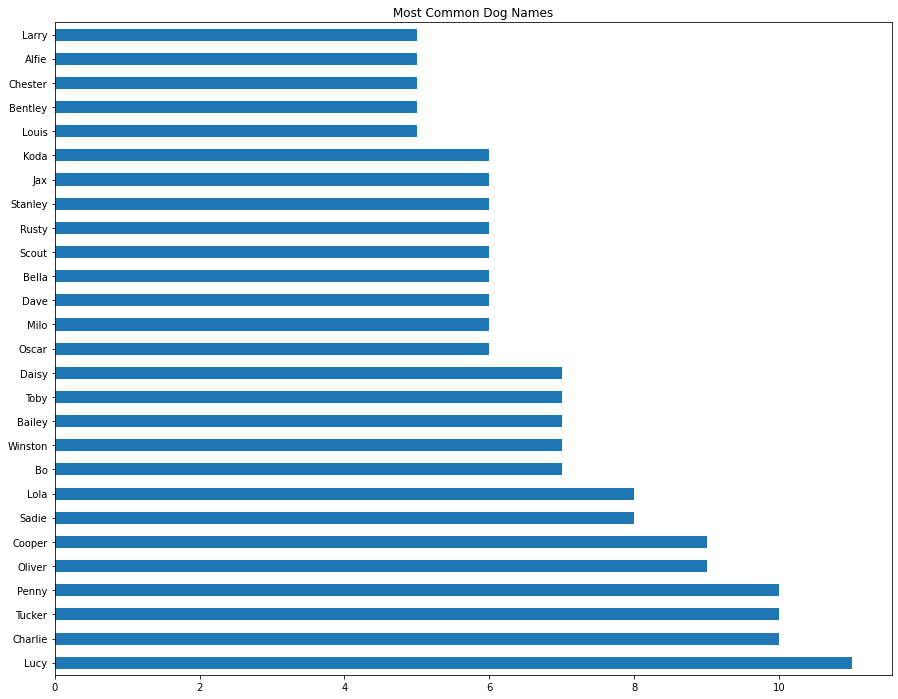

In [513]:
# Histogram to visualize doglingo types
dog_name = df.groupby('name').filter(lambda x: len(x) >= 5)

dog_name['name'].value_counts().plot(kind = 'barh',figsize=(15,12));
plt.title('Most Common Dog Names')



This graph visualises the most popular dog names
Lucy is the most popular, foloows by Charlie, Tucker and Penny

## Insight 2 The most frequent DogLingo dog types

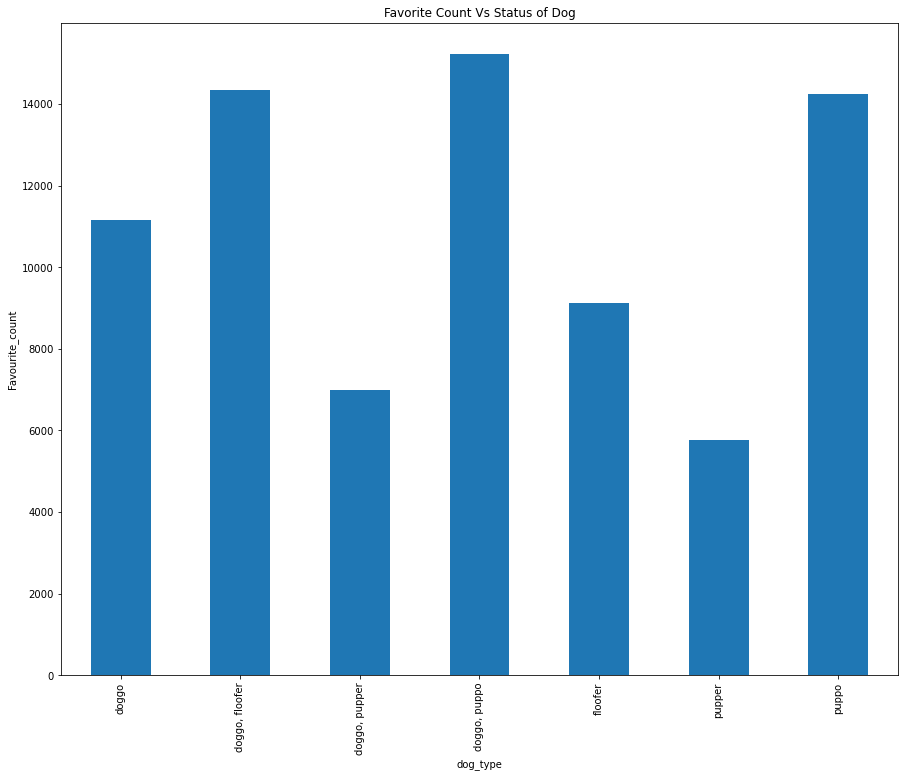

In [512]:
count = df.groupby(['dog_type']).favorite_count.mean()
count.plot(kind='bar',figsize=(15,12))
plt.ylabel('Favourite_count')
plt.title('Favorite Count Vs Status of Dog');

doggo, puppo is the most popular
Followed by doggo, fluffer
Then puppo

## Insight 3 

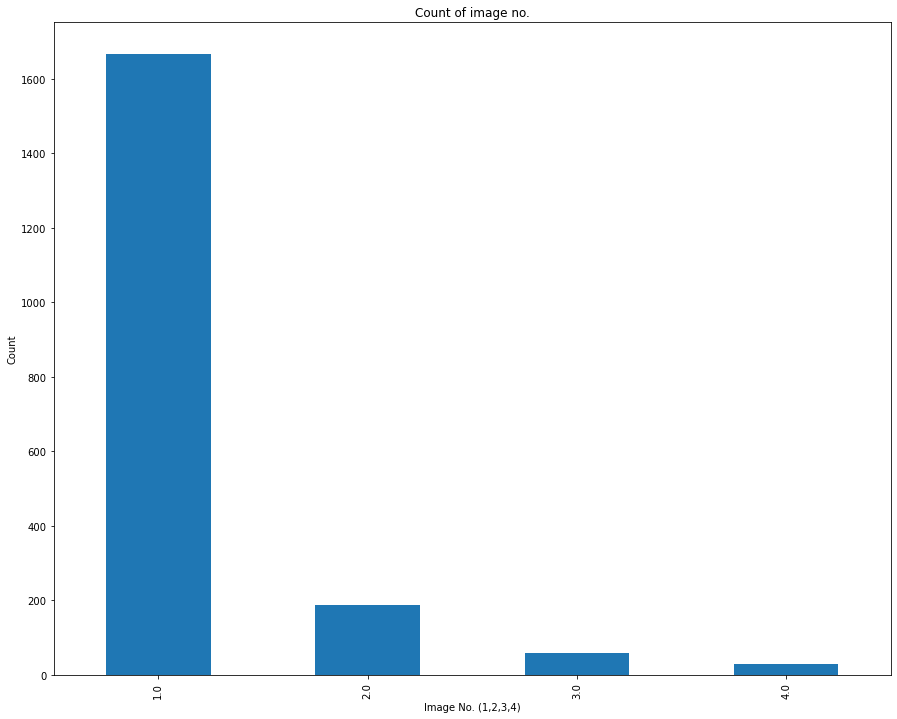

In [514]:
g = df['img_num'].value_counts()
g.plot(kind='bar',figsize=(15,12))
plt.xlabel('Image No. (1,2,3,4)')
plt.ylabel('Count')
plt.title('Count of image no.');

Text(0.5, 1.0, 'Most Rated Doglingo Types')

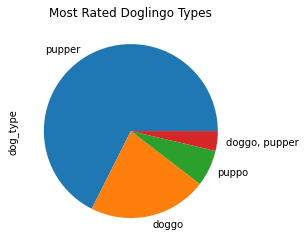

In [517]:
# Histogram to visualize doglingo types
dog_breed = df.groupby('dog_type').filter(lambda x: len(x) >= 10)

dog_breed['dog_type'].value_counts().plot(kind = 'pie')
plt.title('Most Rated Doglingo Types')


References:

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
* https://www.statology.org/pandas-value_counts/
* https://oxylabs.io/blog/python-parse-json
* https://towardsdatascience.com/change-column-data-type-in-pandas-954d7acdef1d
* https://www.educba.com/numpy-nan/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
* https://www.statology.org/pandas-iterate-over-dataframe-columns/